In [12]:
import pandas as pd
from feature_engineering import transform_data
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [13]:
raw_path = "../data/raw/adr6921_Suppl_Excel_v2.csv"

# Read in the raw data
raw_df = pd.read_csv(raw_path, encoding_errors='replace')
# Transform the data and save the processed data to a new CSV file
processed_df = transform_data(raw_df)

In [14]:
# Set 'country' as index
X = processed_df.set_index('country')
# obtain features for clustering
X = X.drop(columns=['total_factories'])

In [15]:
country_names = processed_df['country']

In [16]:
from scipy.cluster.hierarchy import (
    average,
    complete,
    dendrogram,
    fcluster,
    single,
    ward,
)

In [17]:
clustering = AgglomerativeClustering(n_clusters= None, distance_threshold= 0).fit(X)
clustering.labels_

array([47, 43, 41, 44, 49, 58, 35, 31, 33, 51, 39, 37, 57, 52, 36, 48, 50,
       32, 45, 42, 23, 55, 40, 46, 34, 53, 38, 24, 28, 29, 30, 15, 56, 19,
       16, 14, 18, 27, 25, 54, 17,  8, 21,  7, 26, 22, 20,  3, 12,  9, 11,
       13,  5, 10,  4,  1,  6,  2,  0])

Text(0, 0.5, 'distance')

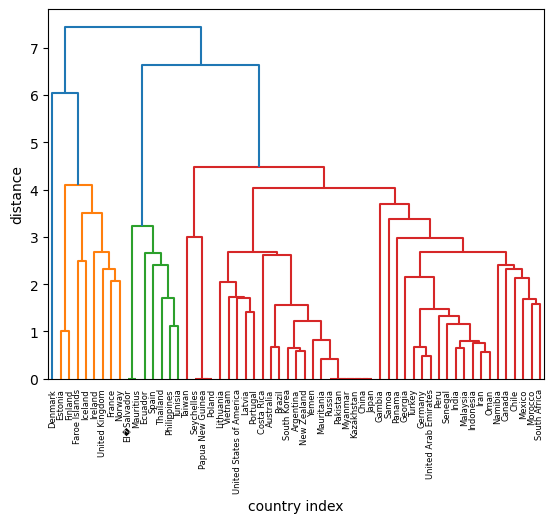

In [18]:
ax = plt.gca()
dendrogram(ward(X), ax=ax, labels=country_names.to_list())
plt.xlabel("country index")
plt.ylabel("distance")

In [19]:
agg = AgglomerativeClustering(n_clusters= None, distance_threshold= 0).fit(X)
agg.labels_

array([47, 43, 41, 44, 49, 58, 35, 31, 33, 51, 39, 37, 57, 52, 36, 48, 50,
       32, 45, 42, 23, 55, 40, 46, 34, 53, 38, 24, 28, 29, 30, 15, 56, 19,
       16, 14, 18, 27, 25, 54, 17,  8, 21,  7, 26, 22, 20,  3, 12,  9, 11,
       13,  5, 10,  4,  1,  6,  2,  0])

In [20]:
import seaborn as sns

<Axes: ylabel='country'>

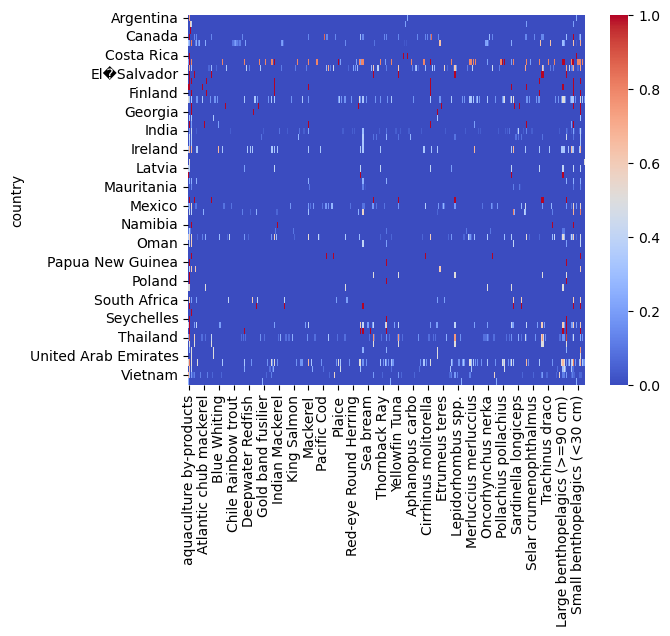

In [21]:
# Creat heatmap of data with country names as labels
sns.heatmap(X, annot=False, cmap='coolwarm')

c:\Users\Elaine\miniforge3\envs\end-use\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


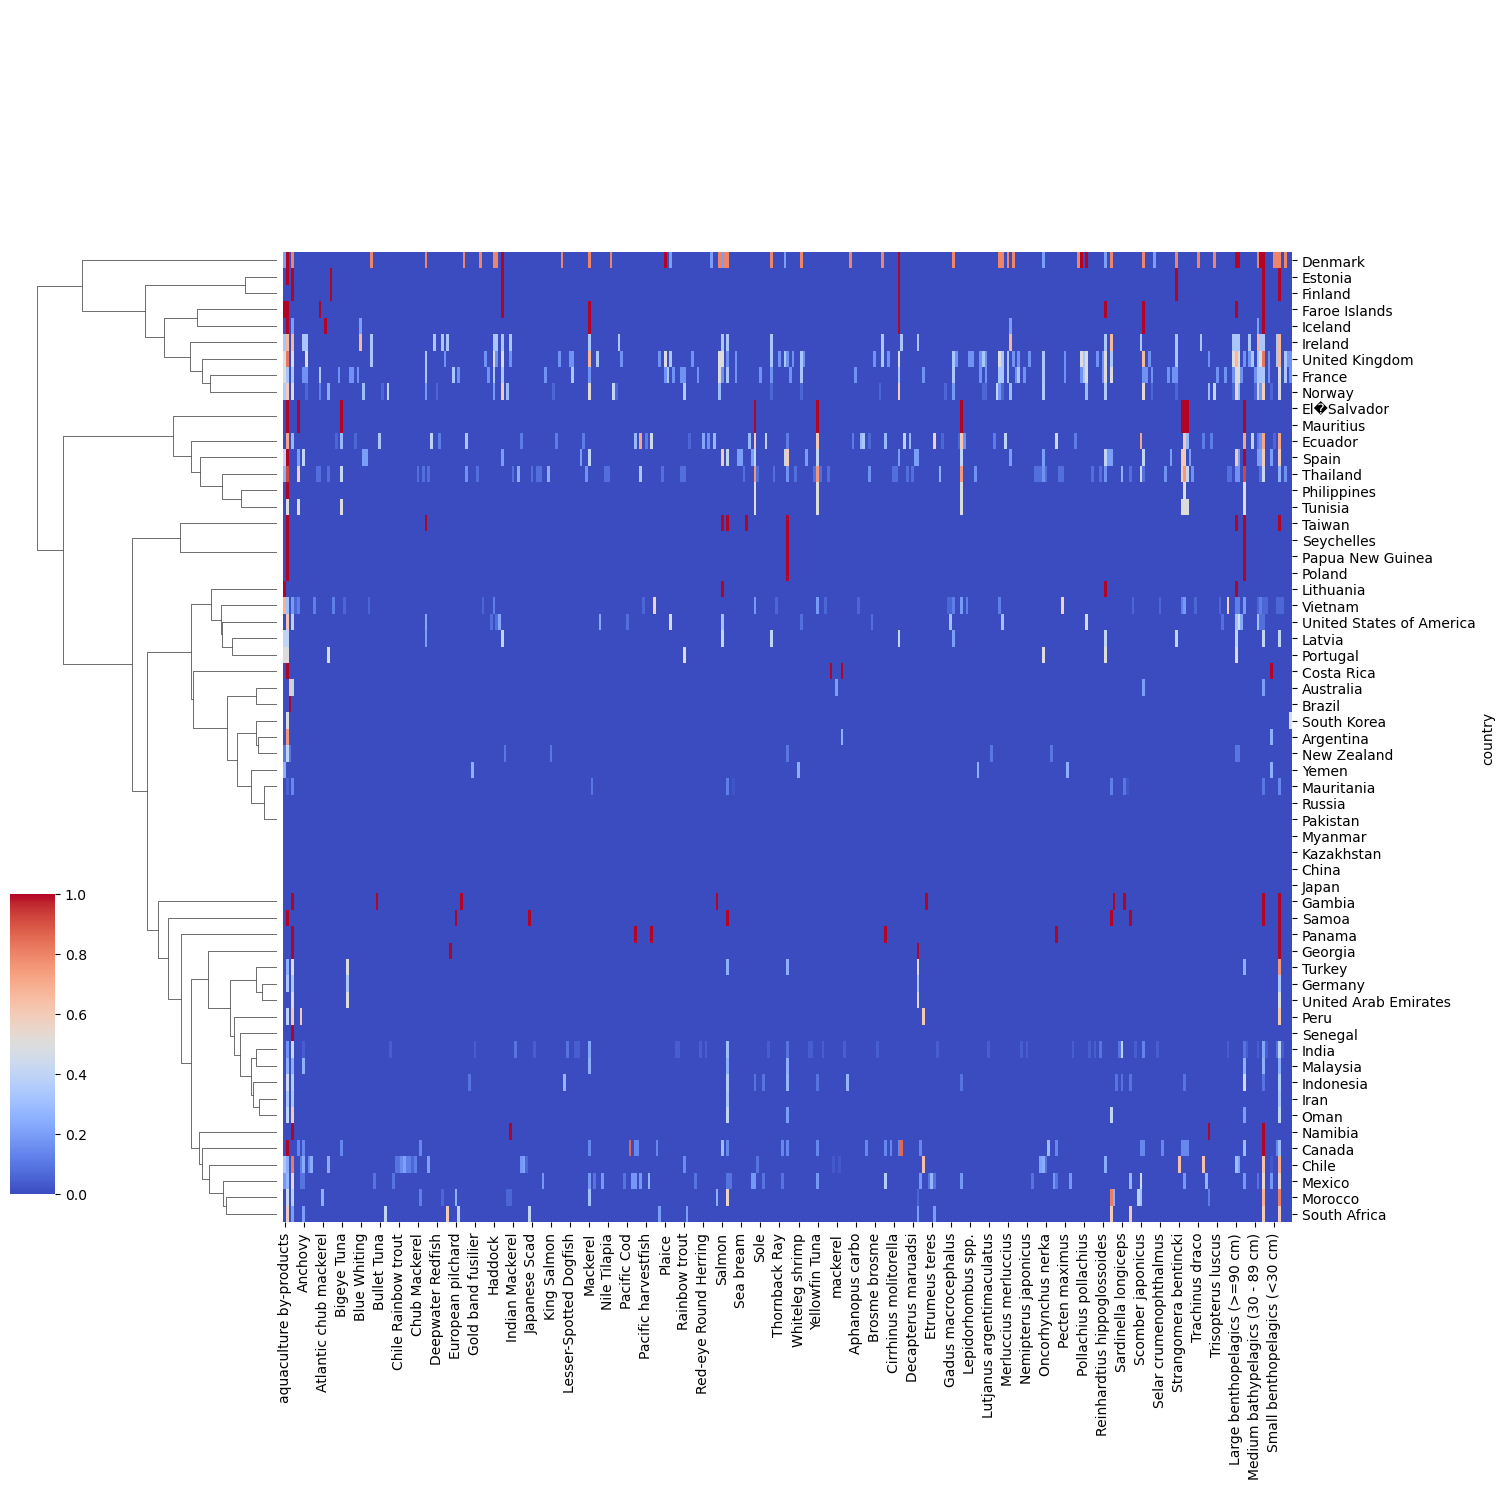

In [28]:
sns.clustermap(X, method='ward', cmap='coolwarm', figsize=(15, 15), cbar_pos= (0, .2, .03, .2), row_cluster=True, col_cluster=False)